In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
two_wheel_combined=pd.read_csv("two_wheeler Victims Combined.csv")

In [ ]:
Y2019_death_data=pd.read_csv("StateUT City  Place of Occurrence-2019.csv")
Y2018_death_data=pd.read_csv("StateUTCity andPlace2018.csv")
Y2017_death_data=pd.read_csv("StateUTCityPlace-deaths-2017.csv")
drunk_data=pd.read_csv("Drunk cases.csv")
Cause_2019=pd.read_csv("Cause-wise Distribution2019.csv")
Cause_2018=pd.read_csv("Cause-wise-2018.csv")
Cause_2017=pd.read_csv("Cause-wise-2017.csv")
Mode_2019=pd.read_csv("Mode-2019.csv")
Mode_2018=pd.read_csv("Mode-2018.csv")
Mode_2017=pd.read_csv("Mode-2017.csv")
two_wheel_combined=pd.read_csv("two_wheeler Victims Combined.csv")
time_3_yrs=pd.read_csv("Time of Occurrence-3 years.csv")

In [ ]:
# Drop the additional column sl.No from 2018 data
Y2018_death_data.drop(columns="Sl. No.",inplace=True)

# Drop the additional column sl.No from 2017 data
Y2017_death_data.drop(columns="Sl. No.",inplace=True)

#Check if every columns in all the three datasets have same name

Y2017_cols=Y2017_death_data.columns
Y2018_cols=Y2018_death_data.columns
Y2019_cols=Y2019_death_data.columns
print("2019 intersection 2017",len(Y2019_cols.intersection(Y2017_cols)))
print("2019 intersection 2018",len(Y2019_cols.intersection(Y2018_cols)))
print("2018 intersection 2017",len(Y2018_cols.intersection(Y2017_cols)))
print("2019 difference 2017",len(Y2019_cols.difference(Y2017_cols)))
print("2019 difference 2018",len(Y2019_cols.difference(Y2018_cols)))
print("2018 difference 2017",len(Y2018_cols.difference(Y2017_cols)))
#66 columns are same for 3 datasets

2019 intersection 2017 66
2019 intersection 2018 66
2018 intersection 2017 66
2019 difference 2017 0
2019 difference 2018 0
2018 difference 2017 0


In [ ]:
#Create a new dataframes with states and UT data of 2019,2018,2017
stut_2019=Y2019_death_data[(Y2019_death_data["Category"]=='State') | (Y2019_death_data["Category"]=='Union Territory')]
stut_2018=Y2018_death_data[(Y2018_death_data["Category"]=='State') | (Y2018_death_data["Category"]=='Union Territory')]
stut_2017=Y2017_death_data[(Y2017_death_data["Category"]=='State') | (Y2017_death_data["Category"]=='Union Territory')]
#add year column
stut_2019["Year"]='2019'
stut_2018["Year"]='2018'
stut_2017["Year"]='2017'
#change the content in all the 3 dataframes to Upper case for easy analysis
stut_2019.Category=stut_2019.Category.str.upper()
stut_2019["State/UT/City"]=stut_2019["State/UT/City"].str.upper()
stut_2018.Category=stut_2018.Category.str.upper()
stut_2018["State/UT/City"]=stut_2018["State/UT/City"].str.upper()
stut_2017.Category=stut_2017.Category.str.upper()
stut_2017["State/UT/City"]=stut_2017["State/UT/City"].str.upper()

#Creating a single dataframe with year wise total cases

Combined_2_yrs=pd.merge(stut_2019,stut_2018,on=['Category','State/UT/City'])
Combined_3_yrs=pd.merge(Combined_2_yrs,stut_2017,on=['Category','State/UT/City'])

#Create a new dataframe with total death counts
Cols_needed=['Category','State/UT/City','Grand Total - Total_x','Year_x','Grand Total - Total_y','Year_y','Grand Total - Total','Year']
diff_cols=Combined_3_yrs.columns.difference(Cols_needed)
Combined_3_yrs_tot=Combined_3_yrs.drop(columns=diff_cols,index=range(0,29))
Combined_3_yrs_tot=Combined_3_yrs_tot.drop(index=range(30,37))

#Combined_3_yrs.columns["Rural Area (Near School/College/Educational Institution) - Male_x" :"Grand Total - Total"]
Yearly_count=Combined_3_yrs_tot.groupby(["Year_x","Year_y","Year"]).sum().sort_values(by="Grand Total - Total_y",ignore_index=True)

#Renaming Columns

Yearly_count = Yearly_count.rename(columns={"Grand Total - Total_x":"2019","Grand Total - Total_y":"2018","Grand Total - Total":'2017'})

Yearly_count=Yearly_count.T
Yearly_count.columns=["Count"]
Yearly_count.insert(0,'Year',range(2019,2016,-1))
Yearly_count=Yearly_count.sort_values(by='Year',ignore_index=True)

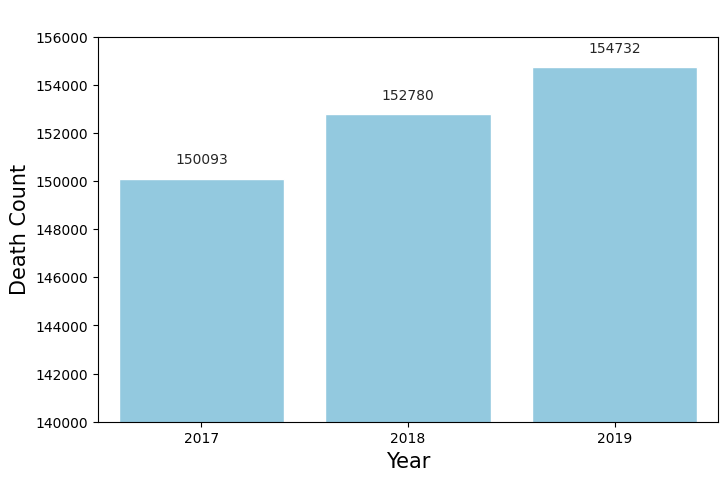

In [ ]:
#Plot a barchart which shows the death count Over 3 Years
plt.figure(figsize=(8,5))
plt.title(" ",fontsize=18)
sns.set_style('darkgrid')
g=sns.barplot(data=Yearly_count,x='Year',y='Count',color='skyblue')
plt.ylabel("Death Count",fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylim(140000, 156000)
for index, value in enumerate(Yearly_count['Count']):
    plt.text(index, value + 500, str(value), ha='center', va='bottom', fontsize=10)
# plt.ylim(0, max(Yearly_count['Count']) + 20000)
plt.show()


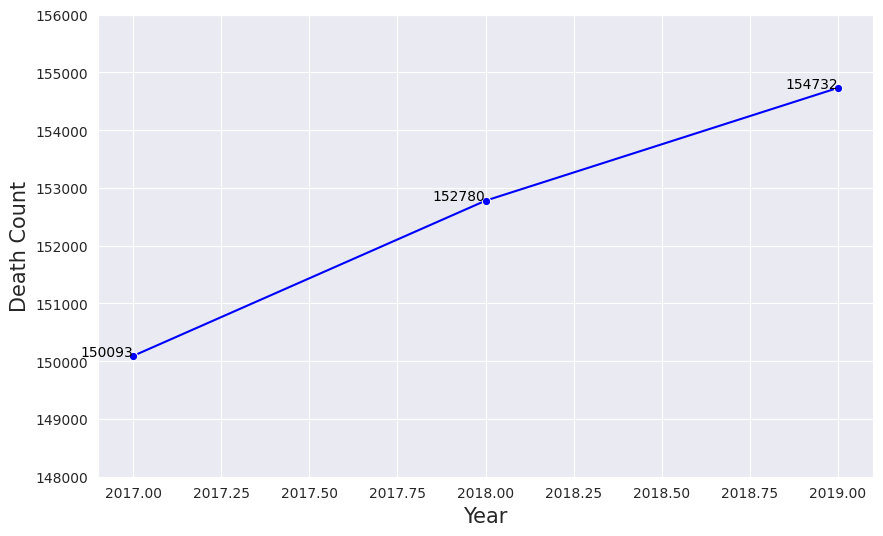

In [ ]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

# ... (loading data and data preprocessing code)

# Plot a line graph which shows the death count Over 3 Years
plt.figure(figsize=(10, 6))
plt.title("", fontsize=18)
sns.set_style('darkgrid')

g = sns.lineplot(data=Yearly_count, x='Year', y='Count', marker='o', color='blue')

plt.ylabel("Death Count", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylim(148000, 156000)

# Adding data labels to each point on the line
for line in range(0, Yearly_count.shape[0]):
     g.text(Yearly_count['Year'][line], Yearly_count['Count'][line], Yearly_count['Count'][line], color='black', ha='right')

plt.show()


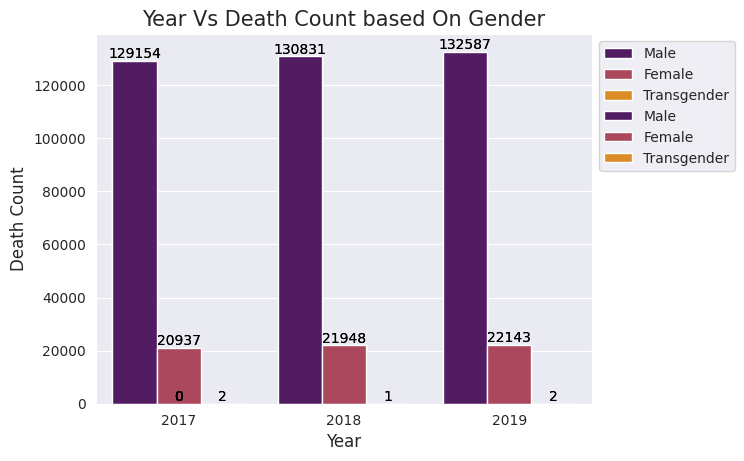

In [ ]:
#get male female and transgender count for 3 years
Cols_needed=['Category','State/UT/City','Grand Total - Male_x','Grand Total - Female_x','Grand Total - Transgender_x','Year_x','Grand Total - Male_y','Grand Total - Female_y','Grand Total - Transgender_y','Year_y','Grand Total - Male','Grand Total - Female','Grand Total - Transgender','Year']
diff_cols=Combined_3_yrs.columns.difference(Cols_needed)
Combined_3_yrs_genderwise=Combined_3_yrs.drop(columns=diff_cols,index=range(0,29))
Combined_3_yrs_genderwise=Combined_3_yrs_genderwise.drop(index=range(30,37))

Yearly_Genderwise_count=Combined_3_yrs_genderwise.groupby(["Year_x","Year_y","Year"]).sum().sort_values(by="Grand Total - Male_y",ignore_index=True)

Yearly_Genderwise_count=Yearly_Genderwise_count.T

Yearly_Genderwise_count.columns=["Count"]
Yearly_Genderwise_count["Year"]=[2019,2019,2019,2018,2018,2018,2017,2017,2017]
Yearly_Genderwise_count['S.No']=range(1,10)
Yearly_Genderwise_count.set_index('S.No')
Yearly_Genderwise_count["Gender"]='Male'
Yearly_Genderwise_count["Gender"][0]='Male'
Yearly_Genderwise_count["Gender"][1]='Female'
Yearly_Genderwise_count["Gender"][2]='Transgender'
Yearly_Genderwise_count["Gender"][3]='Male'
Yearly_Genderwise_count["Gender"][4]='Female'
Yearly_Genderwise_count["Gender"][5]='Transgender'
Yearly_Genderwise_count["Gender"][6]='Male'
Yearly_Genderwise_count["Gender"][7]='Female'
Yearly_Genderwise_count["Gender"][8]='Transgender'
Yearly_Genderwise_count.reset_index(drop=True)
Yearly_Genderwise_count.drop(columns='S.No',inplace=True)
# plt.figure(figsize=(8,5))
# plt.title("Year Vs Death Count based On Gender ",fontsize=15)

sns.set_style('darkgrid')
sns.barplot(data=Yearly_Genderwise_count,x='Year',y='Count',hue='Gender', palette='inferno')
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# plt.ylabel("Death Count",fontsize=12)
# plt.xlabel("Year",fontsize=12)
# plt.show()


# plt.figure(figsize=(8,5))
plt.title("Year Vs Death Count based On Gender", fontsize=15)
sns.set_style('darkgrid')

# Create barplot
g = sns.barplot(data=Yearly_Genderwise_count, x='Year', y='Count', hue='Gender', palette='inferno')

# Add annotations above the bars
for p in g.patches:
    g.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10, color='black')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel("Death Count", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.show()


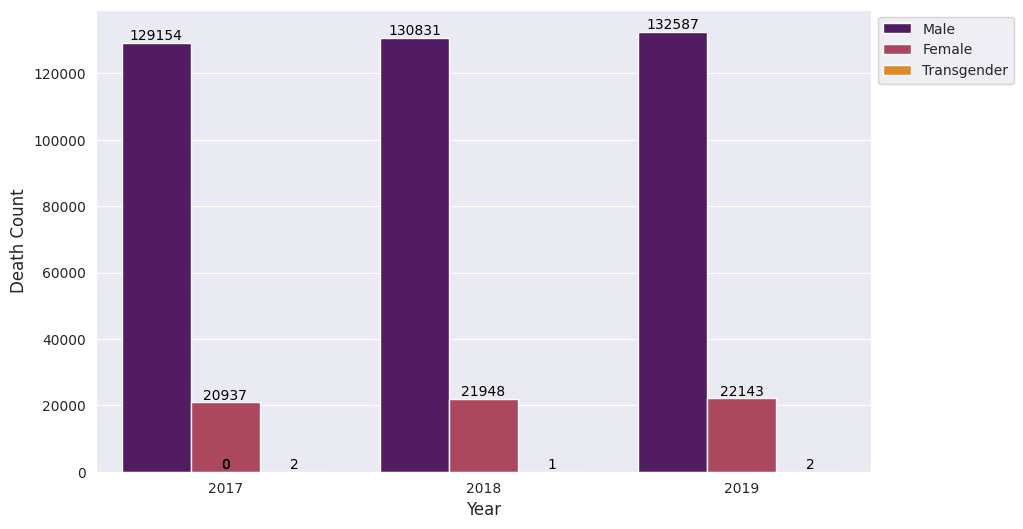

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named Yearly_Genderwise_count with columns 'Year', 'Count', and 'Gender'

plt.figure(figsize=(10, 6))
plt.title("", fontsize=15)
sns.set_style('darkgrid')

# Create barplot
g = sns.barplot(data=Yearly_Genderwise_count, x='Year', y='Count', hue='Gender', palette='inferno')

# Add annotations above the bars
for p in g.patches:
    g.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10, color='black')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel("Death Count", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.show()


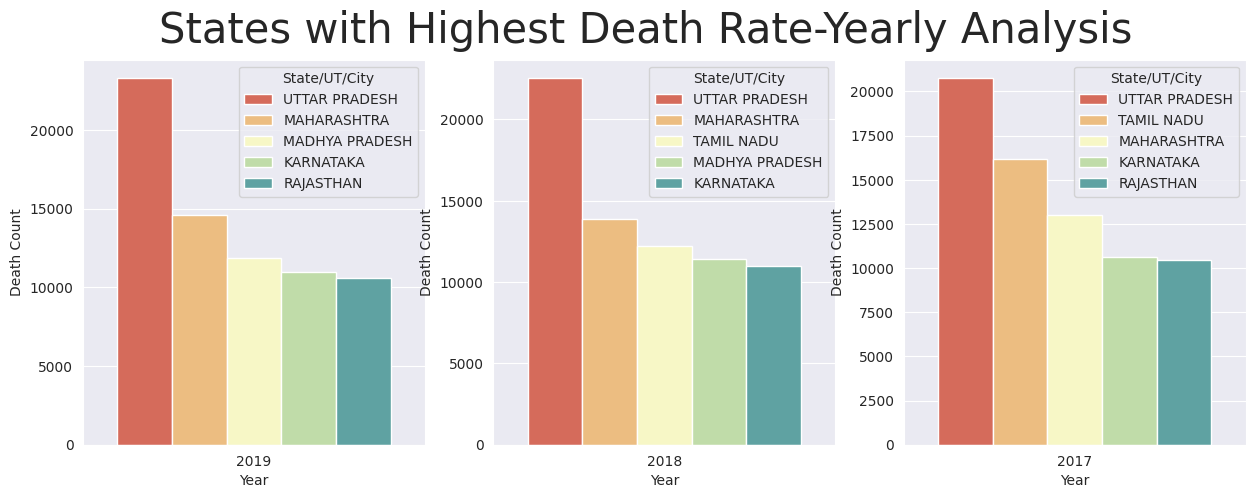

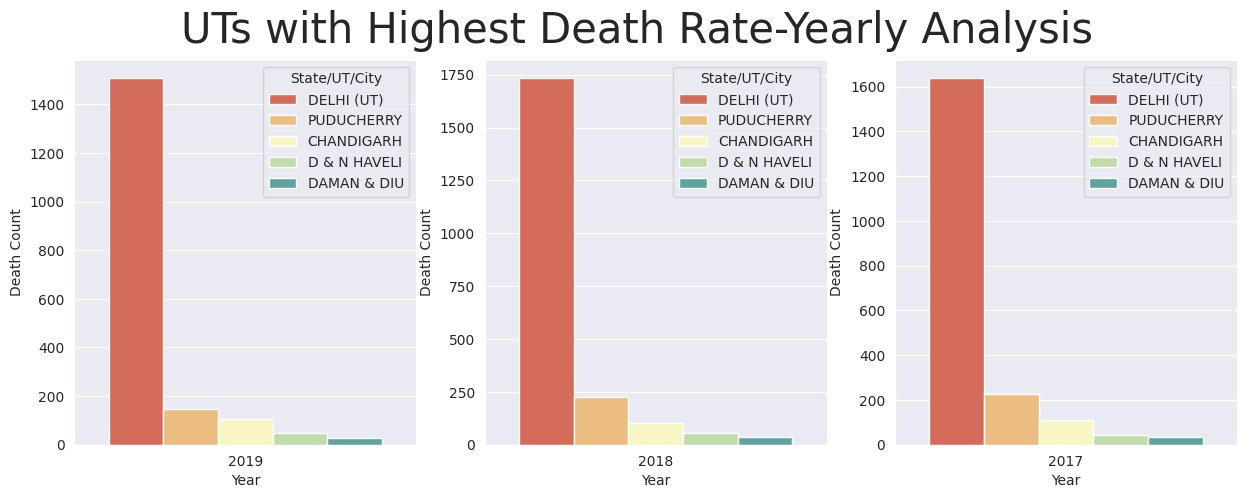

KeyError: 'State'

In [ ]:
Cols_needed=['State/UT/City','Grand Total - Total','Year']
diff_cols=stut_2019.columns.difference(Cols_needed)
st_2019=stut_2019.drop(columns=diff_cols,index=range(29,38))
st_2018=stut_2018.drop(columns=diff_cols,index=range(29,38))
st_2017=stut_2017.drop(columns=diff_cols,index=range(29,38))
st_2019_top5=st_2019.sort_values(by='Grand Total - Total',ascending=False,ignore_index=True).head()
st_2018_top5=st_2018.sort_values(by='Grand Total - Total',ascending=False,ignore_index=True).head()
st_2017_top5=st_2017.sort_values(by='Grand Total - Total',ascending=False,ignore_index=True).head()
st_2019_top5=st_2019_top5.rename(columns={"Grand Total - Total":"Death Count"})
st_2018_top5=st_2018_top5.rename(columns={"Grand Total - Total":"Death Count"})
st_2017_top5=st_2017_top5.rename(columns={"Grand Total - Total":"Death Count"})
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('States with Highest Death Rate-Yearly Analysis', fontsize=30)

sns.barplot(ax=axes[0], x='Year', y='Death Count', hue='State/UT/City', data=st_2019_top5, palette='Spectral')
sns.barplot(ax=axes[1], x='Year', y='Death Count', hue='State/UT/City', data=st_2018_top5, palette='Spectral')
sns.barplot(ax=axes[2], x='Year', y='Death Count', hue='State/UT/City', data=st_2017_top5, palette='Spectral')

plt.show()

Cols_needed=['State/UT/City','Grand Total - Total','Year']
diff_cols=stut_2019.columns.difference(Cols_needed)
ut_2019=stut_2019.drop(columns=diff_cols,index=range(0,30))
ut_2018=stut_2018.drop(columns=diff_cols,index=range(0,30))
ut_2017=stut_2017.drop(columns=diff_cols,index=range(0,30))
ut_2019=ut_2019.drop(index=37)
ut_2018=ut_2018.drop(index=37)
ut_2017=ut_2017.drop(index=37)
ut_2019_top5=ut_2019.sort_values(by='Grand Total - Total',ascending=False,ignore_index=True).head()
ut_2018_top5=ut_2018.sort_values(by='Grand Total - Total',ascending=False,ignore_index=True).head()
ut_2017_top5=ut_2017.sort_values(by='Grand Total - Total',ascending=False,ignore_index=True).head()
ut_2019_top5=ut_2019_top5.rename(columns={"Grand Total - Total":"Death Count"})
ut_2018_top5=ut_2018_top5.rename(columns={"Grand Total - Total":"Death Count"})
ut_2017_top5=ut_2017_top5.rename(columns={"Grand Total - Total":"Death Count"})
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('UTs with Highest Death Rate-Yearly Analysis', fontsize=30)

sns.barplot(ax=axes[0], x='Year', y='Death Count', hue='State/UT/City', data=ut_2019_top5, palette='Spectral')
sns.barplot(ax=axes[1], x='Year', y='Death Count', hue='State/UT/City', data=ut_2018_top5, palette='Spectral')
sns.barplot(ax=axes[2], x='Year', y='Death Count', hue='State/UT/City', data=ut_2017_top5, palette='Spectral')

plt.show()

# Create a new dataframes with City data of 2019,2018,2017
City_2019 = Y2019_death_data[(Y2019_death_data["Category"]=='City')]
City_2018 = Y2018_death_data[(Y2018_death_data["Category"]=='City')]
City_2017 = Y2017_death_data[(Y2017_death_data["Category"]=='City')]
# add year column
City_2019["Year"] = '2019'
City_2018["Year"] = '2018'
City_2017["Year"] = '2017'
# change the content in all the 3 dataframes to Upper case for easy analysis
City_2019.Category = City_2019.Category.str.upper()
City_2019["State"] = City_2019["State"].str.upper()
City_2018.Category = City_2018.Category.str.upper()
City_2018["State/UT/City"] = City_2018["State/UT/City"].str.upper()
City_2017.Category = City_2017.Category.str.upper()
City_2017["State/UT/City"] = City_2017["State/UT/City"].str.upper()
City_2019.drop(index=92, inplace=True)
City_2018.drop(index=92, inplace=True)
City_2017.drop(index=92, inplace=True)
City_2019_top5 = City_2019.sort_values(by='Grand Total - Total', ascending=False, ignore_index=True).head()
City_2018_top5 = City_2018.sort_values(by='Grand Total - Total', ascending=False, ignore_index=True).head()
City_2017_top5 = City_2017.sort_values(by='Grand Total - Total', ascending=False, ignore_index=True).head()
City_2019_top5 = City_2019_top5.rename(columns={"Grand Total - Total": "Death Count"})
City_2018_top5 = City_2018_top5.rename(columns={"Grand Total - Total": "Death Count"})
City_2017_top5 = City_2017_top5.rename(columns={"Grand Total - Total": "Death Count"})

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Cities with Highest Death Rate-Yearly Analysis', fontsize=30)

sns.barplot(ax=axes[2], x='Year', y='Death Count', hue='State/UT/City', data=City_2019_top5, palette='Spectral')
sns.barplot(ax=axes[1], x='Year', y='Death Count', hue='State/UT/City', data=City_2018_top5, palette='Spectral')
sns.barplot(ax=axes[0], x='Year', y='Death Count', hue='State/UT/City', data=City_2017_top5, palette='Spectral')

plt.show()
# import matplotlib.pyplot as plt
# import seaborn as sns

# # ... (Previous code remains unchanged)

# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# # fig.suptitle('States with Highest Death Rate-Yearly Analysis', fontsize=30)

# sns.barplot(ax=axes[0], x='Year', y='Death Count', hue='State/UT/City', data=st_2017_top5.sort_values(by='Year', ascending=True), palette='Spectral')
# sns.barplot(ax=axes[1], x='Year', y='Death Count', hue='State/UT/City', data=st_2018_top5.sort_values(by='Year', ascending=True), palette='Spectral')
# sns.barplot(ax=axes[2], x='Year', y='Death Count', hue='State/UT/City', data=st_2019_top5.sort_values(by='Year', ascending=True), palette='Spectral')

# plt.show()

# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# # fig.suptitle('UTs with Highest Death Rate-Yearly Anasilys', fontsize=30)

# sns.barplot(ax=axes[0], x='Year', y='Death Count', hue='State/UT/City', data=ut_2017_top5.sort_values(by='Year', ascending=True), palette='Spectral')
# sns.barplot(ax=axes[1], x='Year', y='Death Count', hue='State/UT/City', data=ut_2018_top5.sort_values(by='Year', ascending=True), palette='Spectral')
# sns.barplot(ax=axes[2], x='Year', y='Death Count', hue='State/UT/City', data=ut_2019_top5.sort_values(by='Year', ascending=True), palette='Spectral')

# plt.show()

# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# # fig.suptitle('Cities with Highest Death Rate-Yearly Analysis', fontsize=30)

# sns.barplot(ax=axes[0], x='Year', y='Death Count', hue='State/UT/City', data=City_2017_top5.sort_values(by='Year', ascending=True), palette='Spectral')
# sns.barplot(ax=axes[1], x='Year', y='Death Count', hue='State/UT/City', data=City_2018_top5.sort_values(by='Year', ascending=True), palette='Spectral')
# sns.barplot(ax=axes[2], x='Year', y='Death Count', hue='State/UT/City', data=City_2019_top5.sort_values(by='Year', ascending=True), palette='Spectral')

# plt.show()


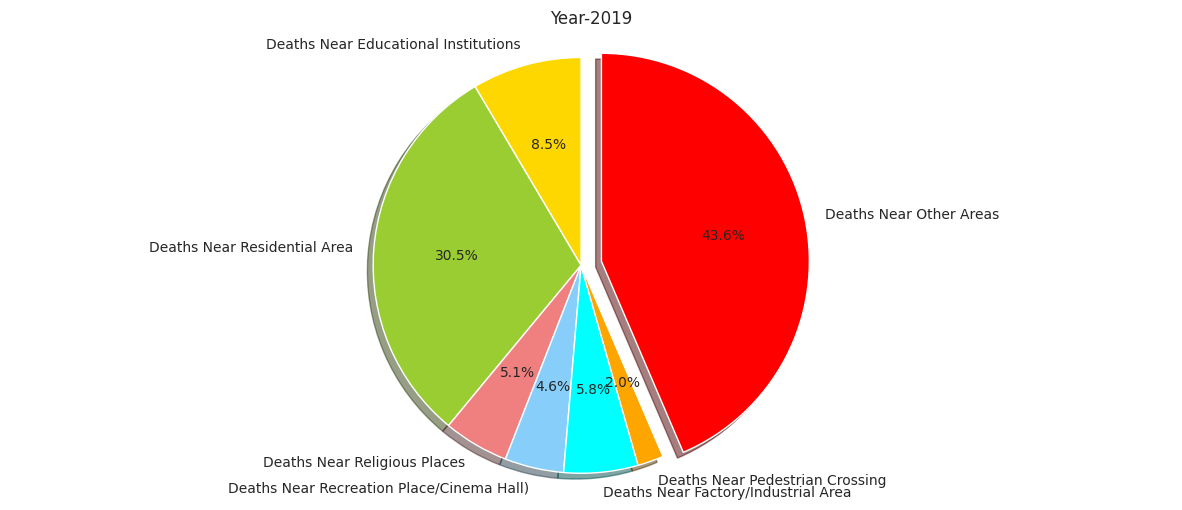

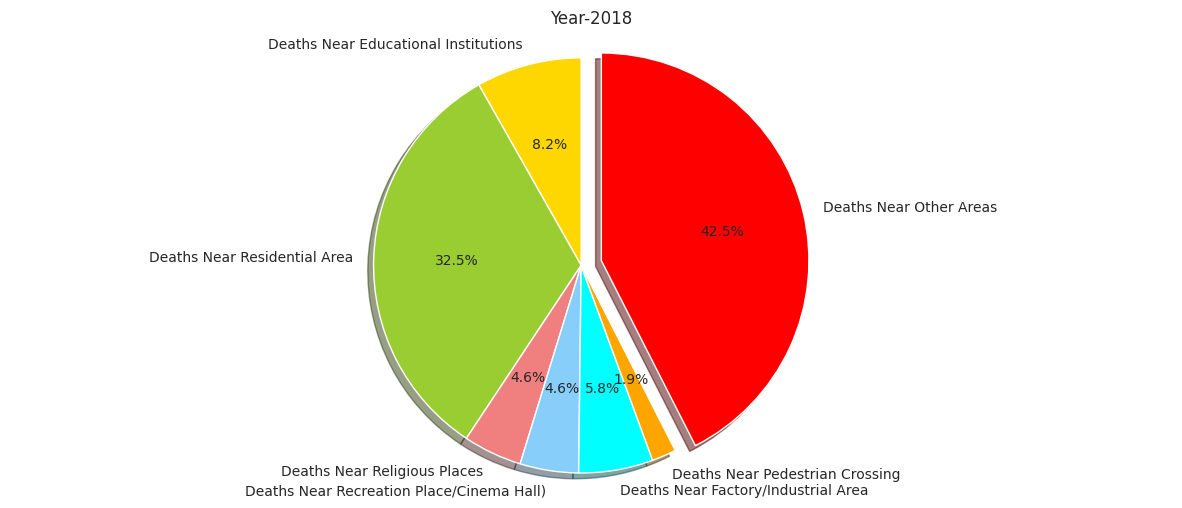

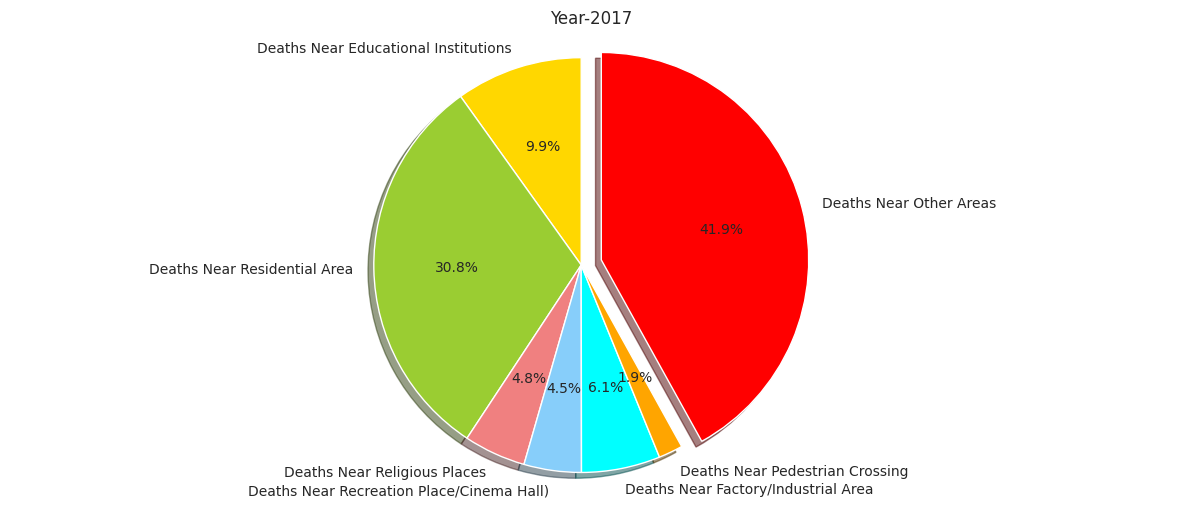

In [ ]:
Total_in_2019=stut_2019[(stut_2019["State/UT/City"]=='TOTAL (STATES)') | (stut_2019["State/UT/City"]=='TOTAL (UTS)')]
Total_in_2018=stut_2018[(stut_2018["State/UT/City"]=='TOTAL (STATES)') | (stut_2018["State/UT/City"]=='TOTAL (UTS)') ]
Total_in_2017=stut_2017[(stut_2017["State/UT/City"]=='TOTAL (STATES)') | (stut_2017["State/UT/City"]=='TOTAL (UTS)') ]
Total_in_2019=Total_in_2019.groupby("Year").sum()
Total_in_2018=Total_in_2018.groupby("Year").sum()
Total_in_2017=Total_in_2017.groupby("Year").sum()
Total_in_2019["Deaths Near Educational Institution"]=Total_in_2019["Rural Area (Near School/College/Educational Institution) - Total"] +Total_in_2019["Urban Area (Near School/College/Educational Institution) - Total"]
Total_in_2019["Deaths Near Residential Area"]=Total_in_2019["Rural Area (Near Residential Area) - Total"]+Total_in_2019["Urban Area (Near Residential Area) - Total"]
Total_in_2019["Deaths Near Religious Places"]=Total_in_2019["Rural Area (Near Religious Place) - Total"]+Total_in_2019["Urban Area (Near Religious Place) - Total"]
Total_in_2019["Deaths Near Recreation Place/Cinema Hall)"]=Total_in_2019["Rural Area (Near Recreation Place/Cinema Hall) - Total"]+Total_in_2019["Urban Area (Near Recreation Place/Cinema Hall) - Total"]
Total_in_2019["Deaths Near Factory/Industrial Area"]=Total_in_2019["Urban Area (Near Factory/Industrial Area) - Total"]+Total_in_2019["Rural Area (Near Factory) - Total"]
Total_in_2019["Deaths Near Pedestrian Crossing"]=Total_in_2019["Urban Area (At Pedestrian Crossing) - Total"]
Total_in_2019["Deaths Near Other Areas"]=Total_in_2019["Urban Area (Others) - Total"]+Total_in_2019["Rural Area (Others) - Total"]

Total_in_2018["Deaths Near Educational Institution"]=Total_in_2018["Rural Area (Near School/College/Educational Institution) - Total"] +Total_in_2018["Urban Area (Near School/College/Educational Institution) - Total"]
Total_in_2018["Deaths Near Residential Area"]=Total_in_2018["Rural Area (Near Residential Area) - Total"]+Total_in_2018["Urban Area (Near Residential Area) - Total"]
Total_in_2018["Deaths Near Religious Places"]=Total_in_2018["Rural Area (Near Religious Place) - Total"]+Total_in_2018["Urban Area (Near Religious Place) - Total"]
Total_in_2018["Deaths Near Recreation Place/Cinema Hall)"]=Total_in_2018["Rural Area (Near Recreation Place/Cinema Hall) - Total"]+Total_in_2018["Urban Area (Near Recreation Place/Cinema Hall) - Total"]
Total_in_2018["Deaths Near Factory/Industrial Area"]=Total_in_2018["Urban Area (Near Factory/Industrial Area) - Total"]+Total_in_2018["Rural Area (Near Factory) - Total"]
Total_in_2018["Deaths Near Pedestrian Crossing"]=Total_in_2018["Urban Area (At Pedestrian Crossing) - Total"]
Total_in_2018["Deaths Near Other Areas"]=Total_in_2018["Urban Area (Others) - Total"]+Total_in_2018["Rural Area (Others) - Total"]

Total_in_2017["Deaths Near Educational Institution"]=Total_in_2017["Rural Area (Near School/College/Educational Institution) - Total"] +Total_in_2017["Urban Area (Near School/College/Educational Institution) - Total"]
Total_in_2017["Deaths Near Residential Area"]=Total_in_2017["Rural Area (Near Residential Area) - Total"]+Total_in_2017["Urban Area (Near Residential Area) - Total"]
Total_in_2017["Deaths Near Religious Places"]=Total_in_2017["Rural Area (Near Religious Place) - Total"]+Total_in_2017["Urban Area (Near Religious Place) - Total"]
Total_in_2017["Deaths Near Recreation Place/Cinema Hall)"]=Total_in_2017["Rural Area (Near Recreation Place/Cinema Hall) - Total"]+Total_in_2017["Urban Area (Near Recreation Place/Cinema Hall) - Total"]
Total_in_2017["Deaths Near Factory/Industrial Area"]=Total_in_2017["Urban Area (Near Factory/Industrial Area) - Total"]+Total_in_2017["Rural Area (Near Factory) - Total"]
Total_in_2017["Deaths Near Pedestrian Crossing"]=Total_in_2017["Urban Area (At Pedestrian Crossing) - Total"]
Total_in_2017["Deaths Near Other Areas"]=Total_in_2017["Urban Area (Others) - Total"]+Total_in_2017["Rural Area (Others) - Total"]

plt.figure(figsize=(15,6))
# Data to plot
labels = 'Deaths Near Educational Institutions', 'Deaths Near Residential Area', 'Deaths Near Religious Places', 'Deaths Near Recreation Place/Cinema Hall)','Deaths Near Factory/Industrial Area','Deaths Near Pedestrian Crossing','Deaths Near Other Areas'
Death_2019 = [13185,47158,7858,7092,8917,3121,67401]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'cyan', 'orange', 'red']
explode = (0, 0, 0, 0, 0, 0, 0.1)  # explode 1st slice

# Plot
# plt.title("Road Accident Deaths in the Country based on Area(2019)\n\n",fontsize=12)
plt.title("Year-2019",fontsize=12)
plt.pie(Death_2019, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

plt.figure(figsize=(15,6))
# Data to plot
labels = 'Deaths Near Educational Institutions', 'Deaths Near Residential Area', 'Deaths Near Religious Places', 'Deaths Near Recreation Place/Cinema Hall)','Deaths Near Factory/Industrial Area','Deaths Near Pedestrian Crossing','Deaths Near Other Areas'
Death_2018 = [12535,49608,6989,6968,8840,2885,64955]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'cyan', 'orange', 'red']
explode = (0, 0, 0, 0, 0, 0, 0.1)  # explode 1st slice

# Plot
# plt.title("Road Accident Deaths in the Country based on Area(2018)\n\n",fontsize=12)
plt.title("Year-2018",fontsize=12)
plt.pie(Death_2018, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

plt.figure(figsize=(15,6))
# Data to plot
labels = 'Deaths Near Educational Institutions', 'Deaths Near Residential Area', 'Deaths Near Religious Places', 'Deaths Near Recreation Place/Cinema Hall)','Deaths Near Factory/Industrial Area','Deaths Near Pedestrian Crossing','Deaths Near Other Areas'
Death_2017= [14836,46282,7248,6713,9215,2835,62964]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'cyan', 'orange', 'red']
explode = (0, 0, 0, 0, 0, 0, 0.1)  # explode 1st slice

# Plot
plt.title("Year-2017",fontsize=12)
plt.pie(Death_2017, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

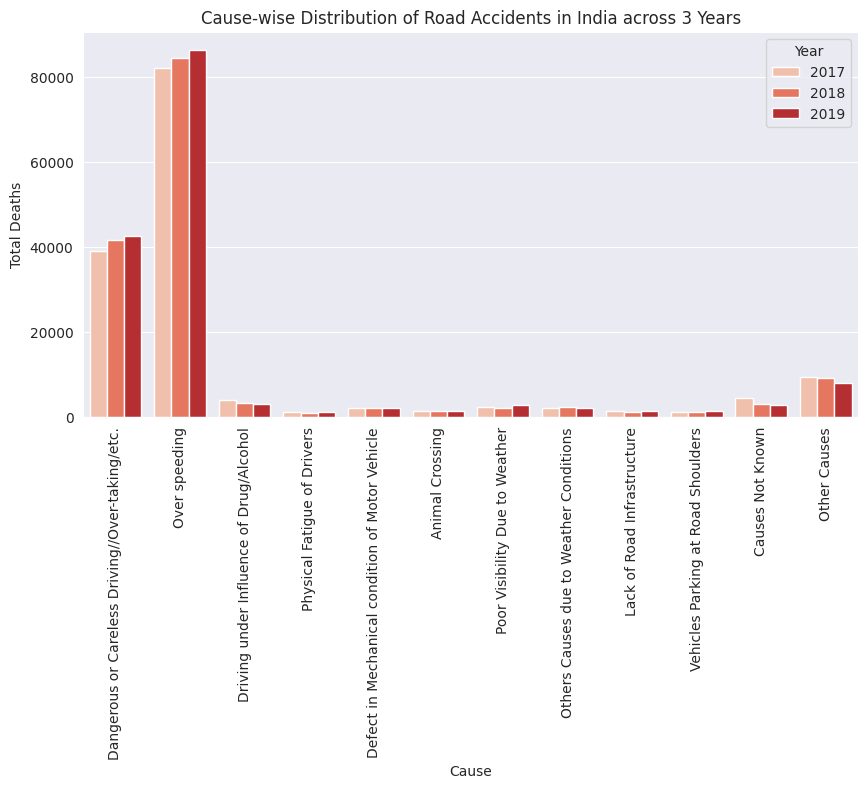

In [ ]:
Cause_2019 = Cause_2019.loc[:, ["Cause", "Persons Died_Total"]]
Cause_2018 = Cause_2018.loc[:, ["Cause", "Persons Died - Total"]]
Cause_2017 = Cause_2017.loc[:, ["Cause", "Persons Died - Total"]]
Cause_2019 = Cause_2019.rename(columns={"Persons Died_Total": "Total Deaths"})
Cause_2018 = Cause_2018.rename(columns={"Persons Died - Total": "Total Deaths"})
Cause_2017 = Cause_2017.rename(columns={"Persons Died - Total": "Total Deaths"})
Cause_2019['Year'] = '2019'
Cause_2018['Year'] = '2018'
Cause_2017['Year'] = '2017'
Cause_2019.drop(index=[12, 13], inplace=True)
Cause_2018.drop(index=[12, 13], inplace=True)
Cause_2017.drop(index=[12, 13], inplace=True)
col_names = ['Cause', 'Total Deaths', 'Year']
Cause_combined = pd.DataFrame(columns=col_names)
Cause_combined = Cause_combined.append(Cause_2017, ignore_index=True)
Cause_combined = Cause_combined.append(Cause_2018, ignore_index=True)
Cause_combined = Cause_combined.append(Cause_2019, ignore_index=True)

plt.figure(figsize=(10, 5))
plt.title("Cause-wise Distribution of Road Accidents in India across 3 Years", fontsize=12)
sns.barplot(data=Cause_combined, x='Cause', hue='Year', y='Total Deaths', palette='Reds')
plt.xticks(rotation='vertical')
plt.show()


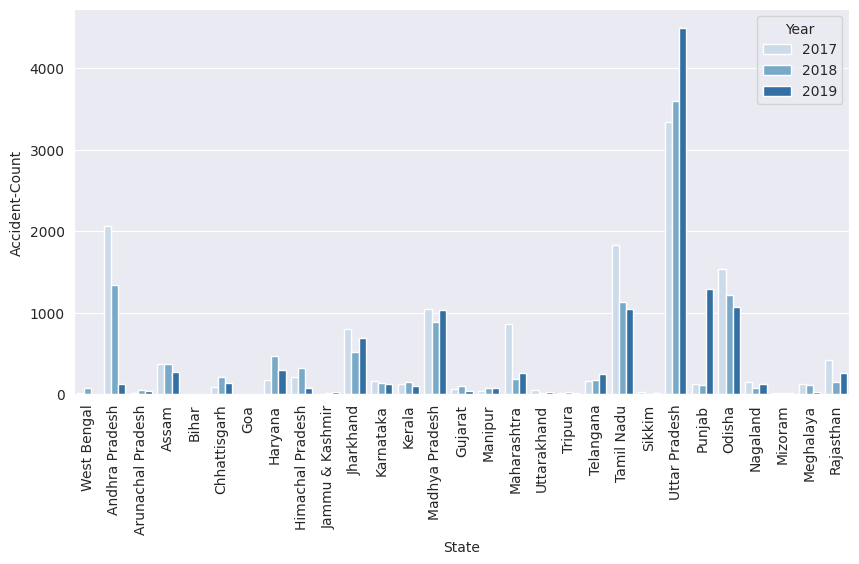

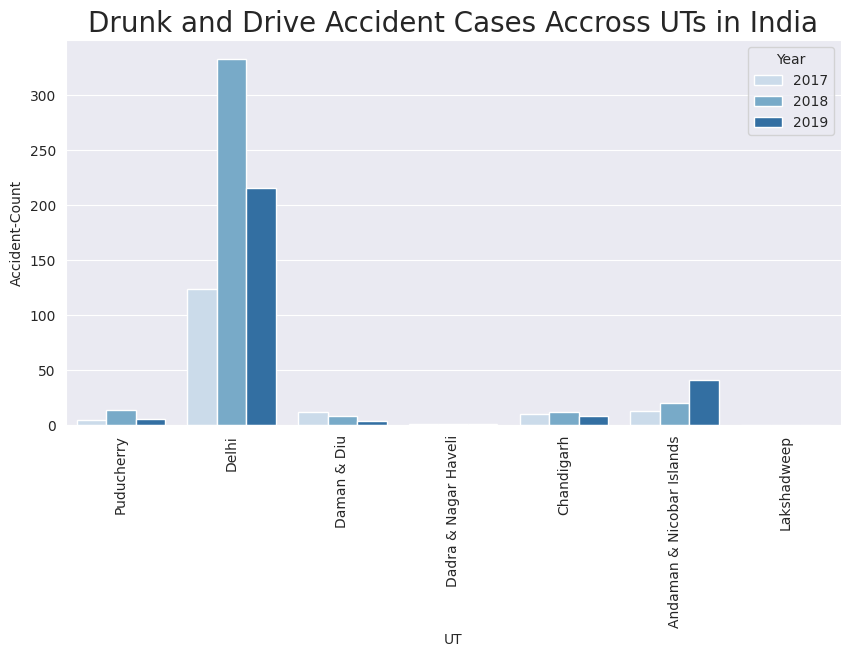

In [ ]:
drunk_data_states=drunk_data.loc[0:28]
#Altering the drunk case df to plot the drunk cases of 3years in one graph
drunk_2019=drunk_data_states.loc[:,['State/UT-wise','State/UT-Wise Total Number of Road Accidents due to Drunken Driving/ Consumption of alcohol during - 2019']]
drunk_2018=drunk_data_states.loc[:,['State/UT-wise','State/UT-Wise Total Number of Road Accidents due to Drunken Driving/ Consumption of alcohol during - 2018']]
drunk_2017=drunk_data_states.loc[:,['State/UT-wise','State/UT-Wise Total Number of Road Accidents due to Drunken Driving/ Consumption of alcohol during - 2017']]
drunk_2019['Year']='2019'
drunk_2018['Year']='2018'
drunk_2017['Year']='2017'
drunk_2019 = drunk_2019.rename(columns={"State/UT-wise":"State","State/UT-Wise Total Number of Road Accidents due to Drunken Driving/ Consumption of alcohol during - 2019":"Accident-Count"})
drunk_2018 = drunk_2018.rename(columns={"State/UT-wise":"State","State/UT-Wise Total Number of Road Accidents due to Drunken Driving/ Consumption of alcohol during - 2018":"Accident-Count"})
drunk_2017 = drunk_2017.rename(columns={"State/UT-wise":"State","State/UT-Wise Total Number of Road Accidents due to Drunken Driving/ Consumption of alcohol during - 2017":"Accident-Count"})
col_names=['State','Accident-Count','Year']
drunk_combined = pd.DataFrame(columns = col_names)
drunk_combined=drunk_combined.append(drunk_2019,ignore_index=True)
drunk_combined=drunk_combined.append(drunk_2018,ignore_index=True)
drunk_combined=drunk_combined.append(drunk_2017,ignore_index=True)
drunk_combined.sort_values(by='Year',inplace=True)
plt.figure(figsize=(10,5))
# plt.title("Drunk and Drive Accident Cases Accross States in India",fontsize=20)
sns.barplot(data=drunk_combined,x='State',hue='Year',y='Accident-Count',palette='Blues')
plt.xticks(rotation='vertical')
plt.show()
drunk_data_ut=drunk_data.iloc[29:36]
drunk_ut_2019=drunk_data_ut.loc[:,['State/UT-wise','State/UT-Wise Total Number of Road Accidents due to Drunken Driving/ Consumption of alcohol during - 2019']]
drunk_ut_2018=drunk_data_ut.loc[:,['State/UT-wise','State/UT-Wise Total Number of Road Accidents due to Drunken Driving/ Consumption of alcohol during - 2018']]
drunk_ut_2017=drunk_data_ut.loc[:,['State/UT-wise','State/UT-Wise Total Number of Road Accidents due to Drunken Driving/ Consumption of alcohol during - 2017']]
drunk_ut_2019['Year']='2019'
drunk_ut_2018['Year']='2018'
drunk_ut_2017['Year']='2017'
drunk_ut_2019 = drunk_ut_2019.rename(columns={"State/UT-wise":"UT","State/UT-Wise Total Number of Road Accidents due to Drunken Driving/ Consumption of alcohol during - 2019":"Accident-Count"})
drunk_ut_2018 = drunk_ut_2018.rename(columns={"State/UT-wise":"UT","State/UT-Wise Total Number of Road Accidents due to Drunken Driving/ Consumption of alcohol during - 2018":"Accident-Count"})
drunk_ut_2017 = drunk_ut_2017.rename(columns={"State/UT-wise":"UT","State/UT-Wise Total Number of Road Accidents due to Drunken Driving/ Consumption of alcohol during - 2017":"Accident-Count"})
col_names=['UT','Accident-Count','Year']
drunk_ut_combined = pd.DataFrame(columns = col_names)
drunk_ut_combined=drunk_ut_combined.append(drunk_ut_2019,ignore_index=True)
drunk_ut_combined=drunk_ut_combined.append(drunk_ut_2018,ignore_index=True)
drunk_ut_combined=drunk_ut_combined.append(drunk_ut_2017,ignore_index=True)
drunk_ut_combined.sort_values(by='Year',inplace=True)
plt.figure(figsize=(10,5))
plt.title("Drunk and Drive Accident Cases Accross UTs in India",fontsize=20)
sns.barplot(data=drunk_ut_combined,x='UT',hue='Year',y='Accident-Count',palette='Blues')
plt.xticks(rotation='vertical')
plt.show()

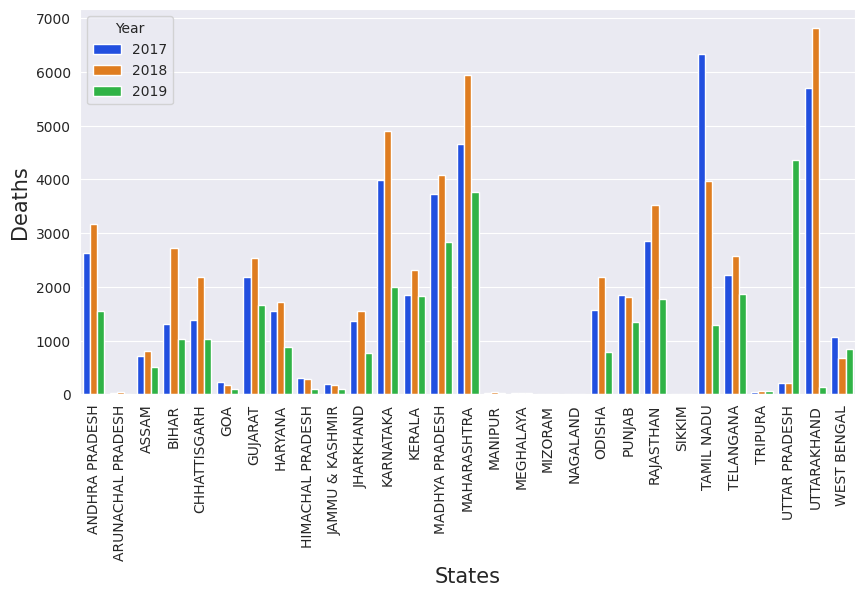

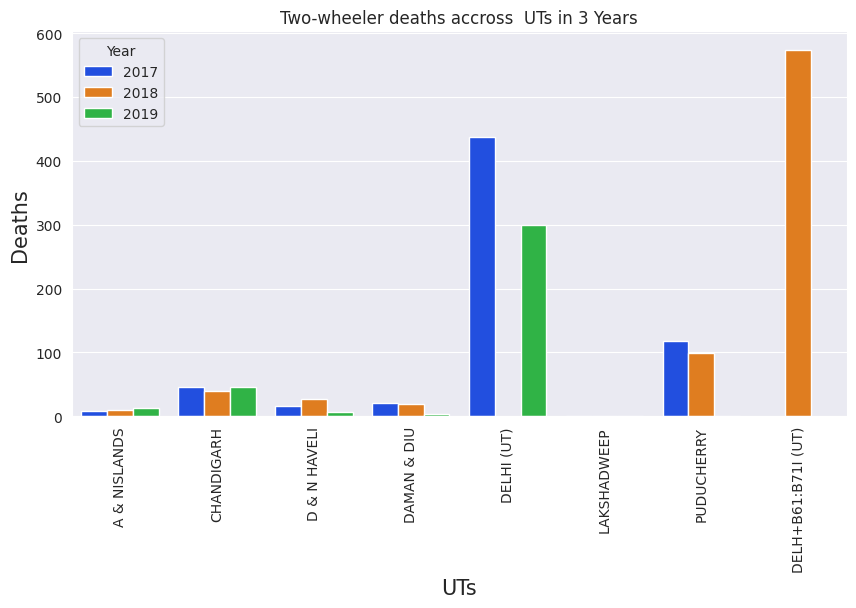

In [ ]:
#State wise data to analyse two wheeler deaths
two_wheel_states=two_wheel_combined[two_wheel_combined["Category"]=='State']
two_wheel_ut=two_wheel_combined[two_wheel_combined["Category"]=='UT']

plt.figure(figsize=(10,5))
# plt.title("Two-wheeler deaths accross States in 3 Years",fontsize=12)
sns.barplot(data=two_wheel_states,x='State/UT/City',hue='Year',y='Two Wheeler_Victims',palette='bright')
plt.xlabel("States",fontsize=15)
plt.ylabel("Deaths",fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(10,5))
plt.title("Two-wheeler deaths accross  UTs in 3 Years",fontsize=12)
sns.barplot(data=two_wheel_ut,x='State/UT/City',hue='Year',y='Two Wheeler_Victims',palette='bright')
plt.xlabel("UTs",fontsize=15)
plt.ylabel("Deaths",fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

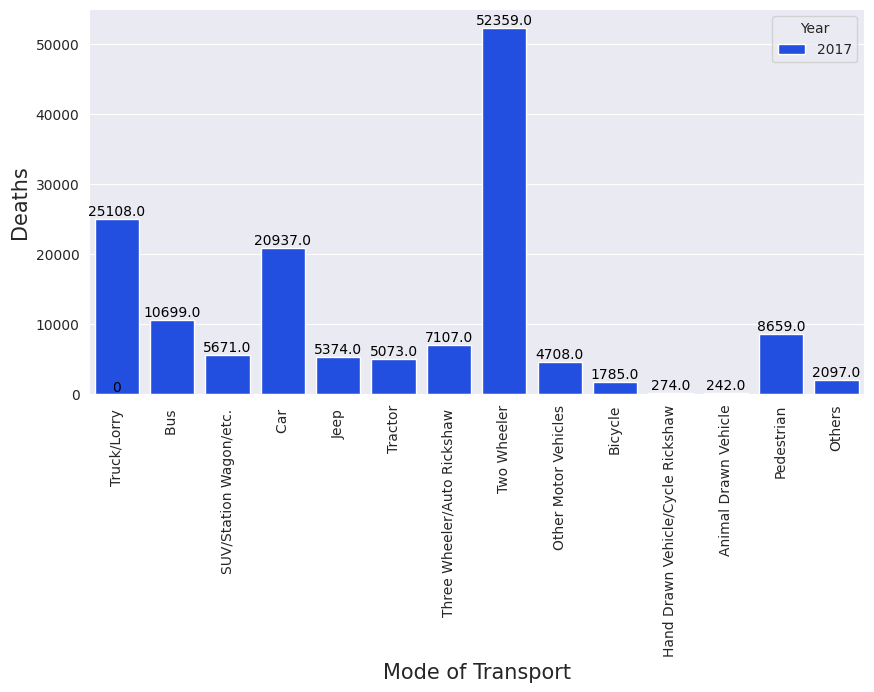

In [ ]:
# plt.figure(figsize=(10,5))
# plt.title("Two-wheeler deaths accross States in 3 Years",fontsize=12)

# sns.barplot(data=Mode_2017,x='Mode of Transport',hue='Year',y='Total Persons Died',palette='bright')
# # Add annotations above the bars
# for bar in bars.patches:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 1), ha='center', va='bottom', fontsize=10, color='black')

# plt.xlabel("States",fontsize=15)
# plt.ylabel("Deaths",fontsize=15)
# plt.xticks(rotation='vertical')

# plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'Mode_2017' with columns like 'Mode of Transport', 'Year', and 'Total Persons Died'

plt.figure(figsize=(10, 5))
# plt.title("Transport_Accidents(2017)", fontsize=16)

# Create a bar plot using Seaborn
bars = sns.barplot(data=Mode_2017, x='Mode of Transport', hue='Year', y='Total Persons Died', palette='bright')

# Add annotations above the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 1), ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Mode of Transport", fontsize=15)
plt.ylabel("Deaths", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


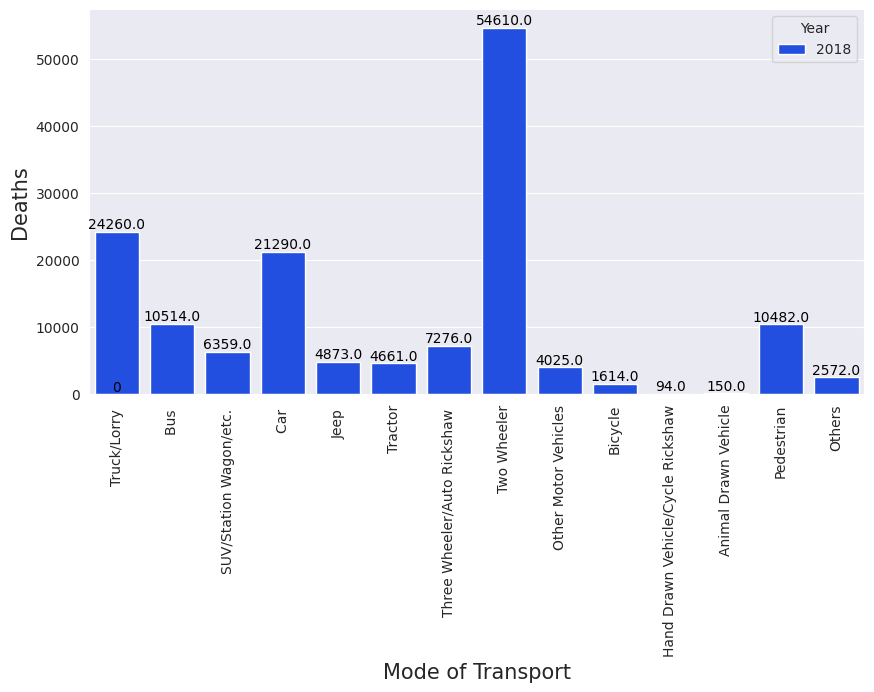

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'Mode_2017' with columns like 'Mode of Transport', 'Year', and 'Total Persons Died'

plt.figure(figsize=(10, 5))
# plt.title("Transport_Accidents(2018)", fontsize=16)

# Create a bar plot using Seaborn
bars = sns.barplot(data=Mode_2018, x='Mode of Transport', hue='Year', y='Total Persons Died', palette='bright')

# Add annotations above the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 1), ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Mode of Transport", fontsize=15)
plt.ylabel("Deaths", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

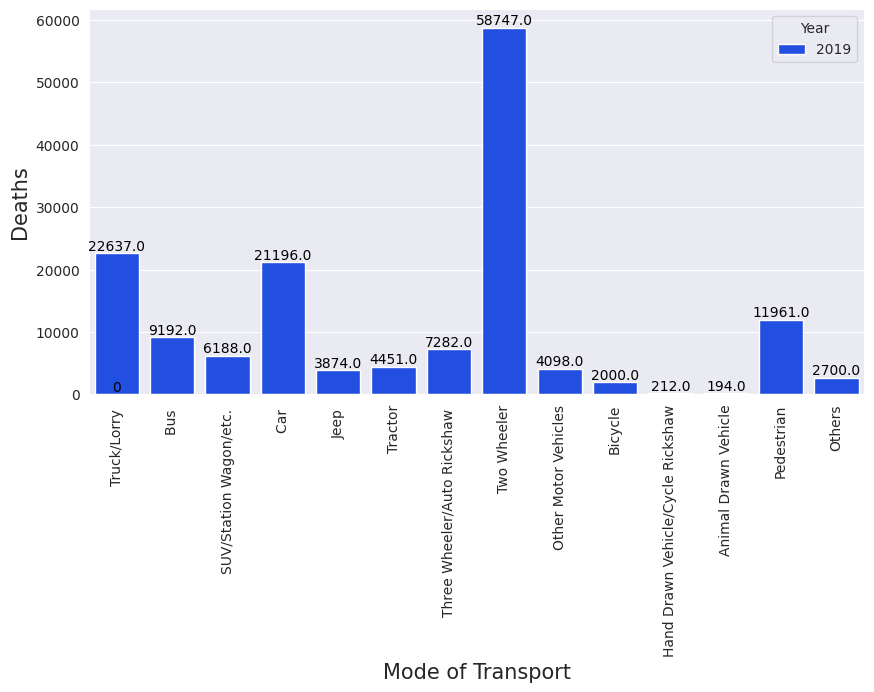

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'Mode_2017' with columns like 'Mode of Transport', 'Year', and 'Total Persons Died'

plt.figure(figsize=(10, 5))
# plt.title("Transport_Accidents(2019)", fontsize=16)

# Create a bar plot using Seaborn
bars = sns.barplot(data=Mode_2019, x='Mode of Transport', hue='Year', y='Total Persons Died', palette='bright')

# Add annotations above the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 1), ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Mode of Transport", fontsize=15)
plt.ylabel("Deaths", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

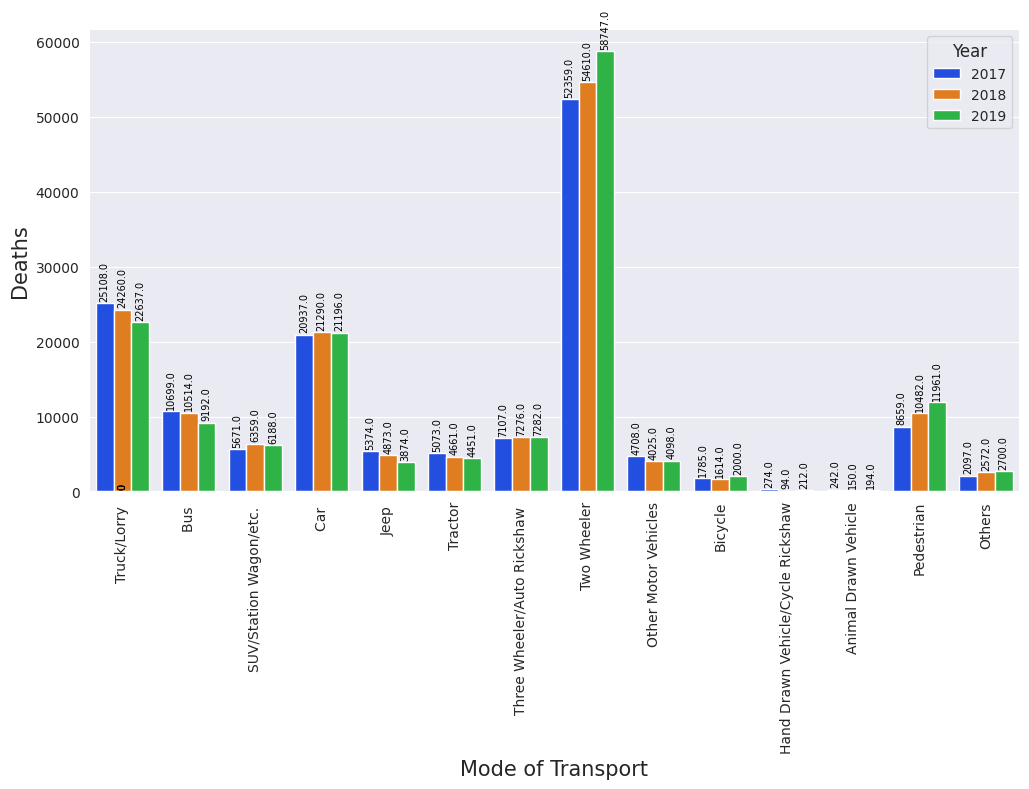

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have DataFrames named 'Mode_2017', 'Mode_2018', and 'Mode_2019'
# with columns like 'Mode of Transport', 'Year', and 'Total Persons Died'

# Combine the three DataFrames
combined_data = pd.concat([Mode_2017.assign(Year='2017'), Mode_2018.assign(Year='2018'), Mode_2019.assign(Year='2019')])

plt.figure(figsize=(12, 6))
# plt.title("Transport_Accidents(2017-2019)", fontsize=16)

# Create a bar plot using Seaborn
bars = sns.barplot(data=combined_data, x='Mode of Transport', hue='Year', y='Total Persons Died', palette='bright')

# Add annotations above the bars with increased spacing
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 300, round(yval, 1), ha='center', va='bottom', fontsize=7, color='black',rotation='vertical')

plt.xlabel("Mode of Transport", fontsize=15)
plt.ylabel("Deaths", fontsize=15)
plt.xticks(rotation='vertical')
plt.legend(title='Year', title_fontsize='12', loc='upper right')
plt.show()




In [ ]:
print(time_3_yrs.columns)


Index(['Time Of Occurance', 'Accident Count', 'Year'], dtype='object')


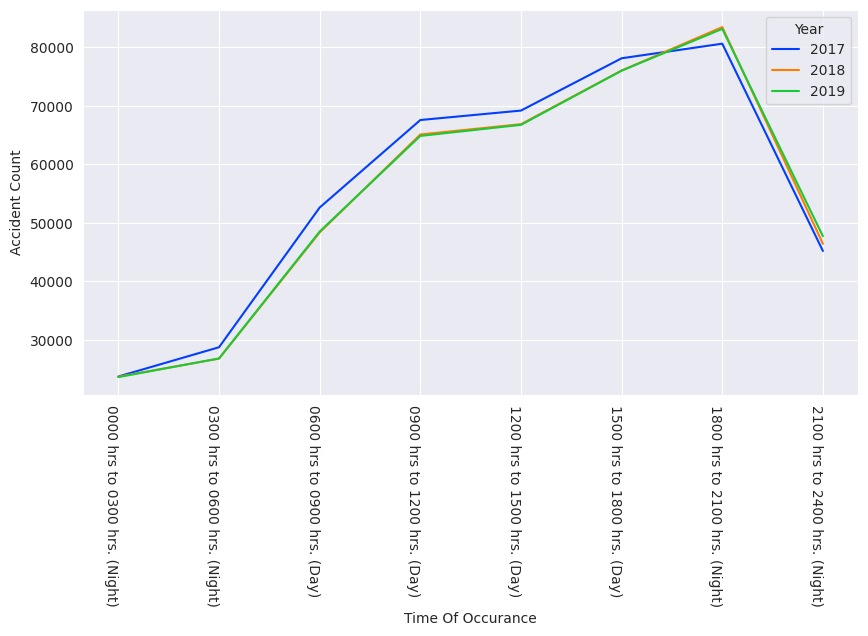

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
# plt.title("Accident Count in India based on Time of Occurrence", fontsize=20)

# Replace 'column_x', 'column_y', and 'column_hue' with your actual column names
sns.lineplot(x='Time Of Occurance', y='Accident Count', hue='Year', data=time_3_yrs, palette='bright')
plt.xticks(rotation=270, ha='right')  # Rotate x-axis labels to 270 degrees
plt.show()


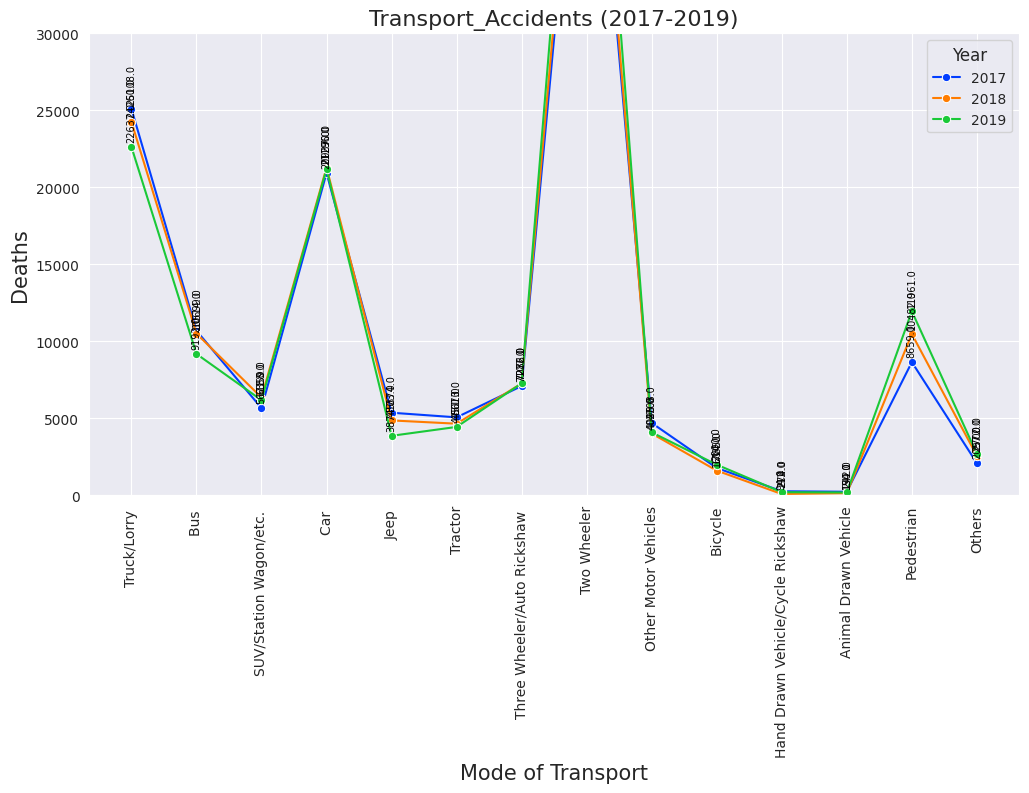

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have DataFrames named 'Mode_2017', 'Mode_2018', and 'Mode_2019'
# with columns like 'Mode of Transport', 'Year', and 'Total Persons Died'

# Combine the three DataFrames
combined_data = pd.concat([Mode_2017.assign(Year='2017'), Mode_2018.assign(Year='2018'), Mode_2019.assign(Year='2019')])

plt.figure(figsize=(12, 6))
plt.title("Transport_Accidents (2017-2019)", fontsize=16)

# Create a line plot using Seaborn
lines = sns.lineplot(data=combined_data, x='Mode of Transport', hue='Year', y='Total Persons Died', palette='bright', marker='o')

# Add annotations above the data points with increased spacing
for line in lines.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        if y < 30000:
            plt.text(x, y + 300, round(y, 1), ha='center', va='bottom', fontsize=7, color='black', rotation='vertical')

plt.xlabel("Mode of Transport", fontsize=15)
plt.ylabel("Deaths", fontsize=15)
plt.xticks(rotation='vertical')
plt.legend(title='Year', title_fontsize='12', loc='upper right')
plt.ylim(0, 30000)  # Set the y-axis limit
plt.show()


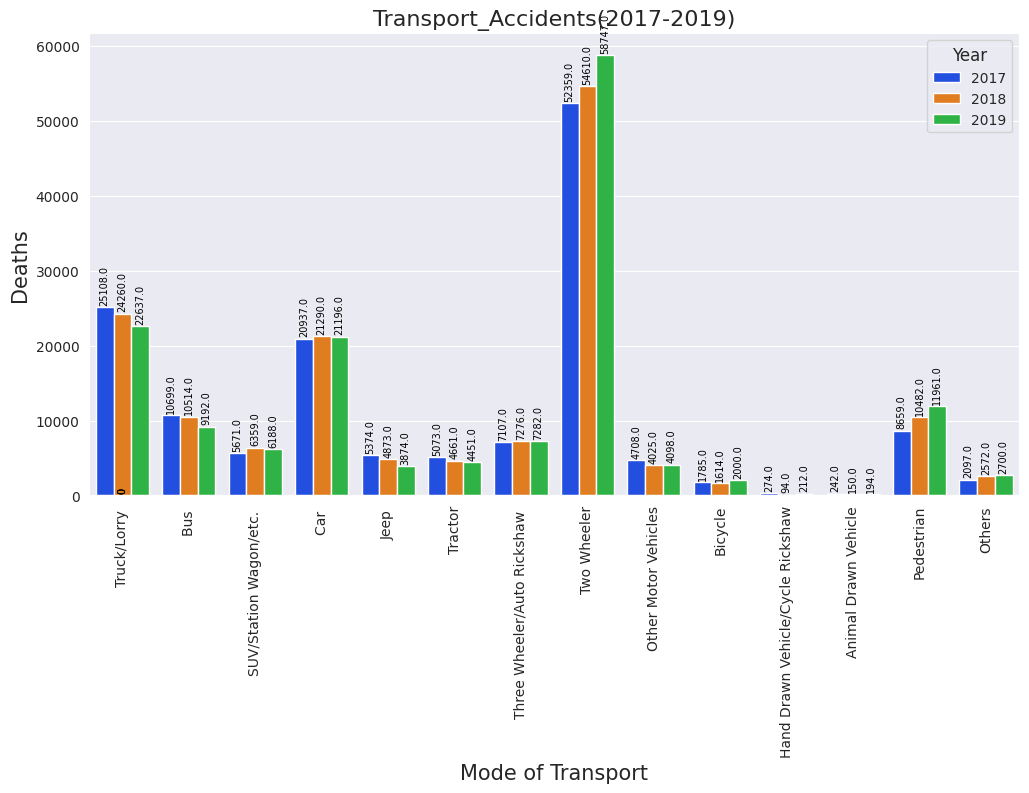

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
combined_data = pd.concat([Mode_2017.assign(Year='2017'), Mode_2018.assign(Year='2018'), Mode_2019.assign(Year='2019')])
plt.figure(figsize=(12, 6))
plt.title("Transport_Accidents(2017-2019)", fontsize=16)
bars = sns.barplot(data=combined_data, x='Mode of Transport', hue='Year', y='Total Persons Died', palette='bright')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 300, round(yval, 1), ha='center', va='bottom', fontsize=7, color='black', rotation='vertical')
plt.xlabel("Mode of Transport", fontsize=15)
plt.ylabel("Deaths", fontsize=15)
plt.xticks(rotation='vertical')
plt.legend(title='Year', title_fontsize='12', loc='upper right')
plt.show()


In [ ]:
rm(list = ls())
x1 <- c(1544,2,517,1031,1023,104,1669,876,111,93,767,1991,1839,2837,3770,28,21,4,1,798,1353,1779,2,1283,1860,61,4365,146,850,13,46,7,3,299,0,0,3164,41,808,2717,2193,182,2546,1716,293,185,1551,4897,2321,4084,5938,39,31,6,4,2184,1806,3516,6,3965,2583,65,222,6818,684,10,40,27,20,574,1,99,2637,33,720,1318,1386,232,2190,1558,306,203,1363,3979,1850,3733,4659,27,30,9,9,1569,1853,2850,12,6329,2225,38,216,5699,1067,8,46,16,21,437,0,118)
x2 <- c(2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017)
df1 <- data.frame(x1,x2)
rs1 = princomp(scale(df1), cor = FALSE)
rs1$scores
summary(rs1)
plot(rs1)
biplot(rs1)

SyntaxError: invalid syntax (<ipython-input-23-f94da008f53c>, line 6)